In [33]:
import pandas as pd
import numpy as np

c=pd.read_csv("/content/mcu_box_office.csv")
c

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
5,The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
6,Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
7,Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
8,Captain America: The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"
9,Guardians of the Galaxy,2,8/1/2014,92,92,121,"170,000,000","94,320,883","333,714,112","770,882,395"


In [34]:
c.dtypes

movie_title             object
mcu_phase                int64
release_date            object
tomato_meter             int64
audience_score           int64
movie_duration           int64
production_budget       object
opening_weekend         object
domestic_box_office     object
worldwide_box_office    object
dtype: object

In [35]:
print(c.shape)

(27, 10)


In [36]:
c.head(1).T

,0
movie_title,Iron Man
mcu_phase,1
release_date,5/2/2008
tomato_meter,94
audience_score,91
movie_duration,126
production_budget,"186,000,000"
opening_weekend,"102,118,668"
domestic_box_office,"318,604,126"
worldwide_box_office,"585,171,547"


In [37]:
c.columns

Index(['movie_title', 'mcu_phase', 'release_date', 'tomato_meter',
       'audience_score', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['movie_title','release_date','production_budget','opening_weekend','domestic_box_office', 'worldwide_box_office']:
    c[col] = lb.fit_transform(c[col])

In [47]:
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(c),
                    columns=c.columns)

In [49]:
x_cols = [x for x in data.columns if x != 'worldwide_box_office']

a_data = data[x_cols]
b_data = data['worldwide_box_office']

In [50]:
a_data

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office
0,0.0,0.000000,0.0,0.959184,0.867925,0.214286,0.0,1.0,0.0
1,0.0,0.000000,0.0,0.408163,0.471698,0.014286,0.0,0.0,1.0
2,0.0,0.000000,0.0,0.510204,0.490566,0.185714,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.612245,0.584906,0.028571,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.653061,0.566038,0.185714,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.897959,0.867925,0.457143,0.0,0.0,0.0
6,0.0,0.333333,0.0,0.653061,0.622642,0.271429,0.0,0.0,0.0
7,0.0,0.333333,0.0,0.387755,0.566038,0.000000,0.0,0.0,0.0
8,0.0,0.333333,0.0,0.877551,0.886792,0.342857,0.0,0.0,0.0
9,0.0,0.333333,0.0,0.918367,0.886792,0.142857,0.0,0.0,0.0


In [51]:
b_data

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    1.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
Name: worldwide_box_office, dtype: float64

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(a_data, b_data)
pred = knn.predict(a_data.values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [53]:
def accuracy(real, predict):
    return sum(b_data == pred) / float(real.shape[0])

In [55]:
print(accuracy(b_data, pred))

0.9629629629629629


In [56]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance',p=1)

knn = knn.fit(a_data, b_data)

pred = knn.predict(a_data.values)

print(accuracy(a_data,pred))

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [59]:
box = list()

for k in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(a_data, b_data)

    pred = knn.predict(a_data.values)
    boff = accuracy(b_data,pred)

    box.append((k,boff))

office_df = pd.DataFrame(box, columns=['k', 'accuracy'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

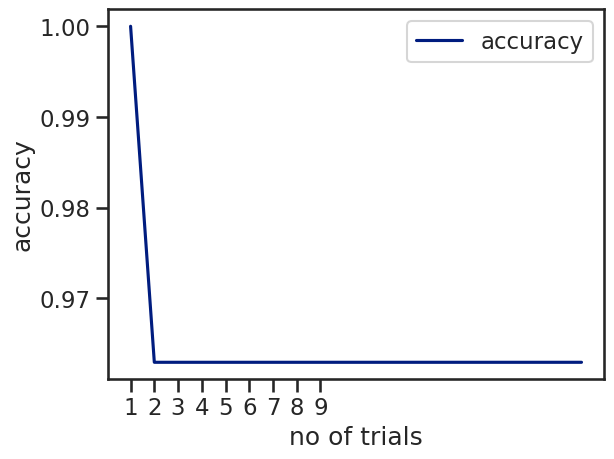

In [63]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = office_df.set_index('k').plot()

ax.set(xlabel='no of trials', ylabel='accuracy')
ax.set_xticks(range(1, 10));